# Projet: Uber Pickups using KMEANS  15 oct 2021
**<p>Author: Said SOUFYAN</p>**

# EDA and exploring Data

In [1]:
!pip install plotly==4.9.0
!pip install jupyterlab "ipywidgets>=7.5"
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('src/uber-raw-data-sep14.csv')
print('Set with labels (our train+test) :', data.shape)
data.drop("Base",inplace=True, axis=1)

data.head(10)

Set with labels (our train+test) : (1028136, 4)


,Date/Time,Lat,Lon
0,9/1/2014 0:01:00,40.2201,-74.0021
1,9/1/2014 0:01:00,40.7500,-74.0027
2,9/1/2014 0:03:00,40.7559,-73.9864
3,9/1/2014 0:06:00,40.7450,-73.9889
4,9/1/2014 0:11:00,40.8145,-73.9444
5,9/1/2014 0:12:00,40.6735,-73.9918
6,9/1/2014 0:15:00,40.7471,-73.6472
7,9/1/2014 0:16:00,40.6613,-74.2691
8,9/1/2014 0:32:00,40.3745,-73.9999
9,9/1/2014 0:33:00,40.7633,-73.9773


In [3]:
data.head()
data =data.iloc[:100000,:]

In [4]:
 data['Dayofweek'] = pd.to_datetime(data['Date/Time']).dt.dayofweek
data.drop("Date/Time",inplace=True, axis=1)

In [5]:
data[10:]

,Lat,Lon,Dayofweek
10,40.7467,-73.6131,0
11,40.8105,-73.9600,0
12,40.6790,-74.0111,0
13,40.4023,-73.9839,0
14,40.7378,-74.0395,0
...,...,...,...
99995,40.7566,-73.9921,1
99996,40.7388,-73.9899,1
99997,40.7260,-74.0007,1
99998,40.7342,-73.8714,1


<AxesSubplot:xlabel='Dayofweek', ylabel='countPicks'>

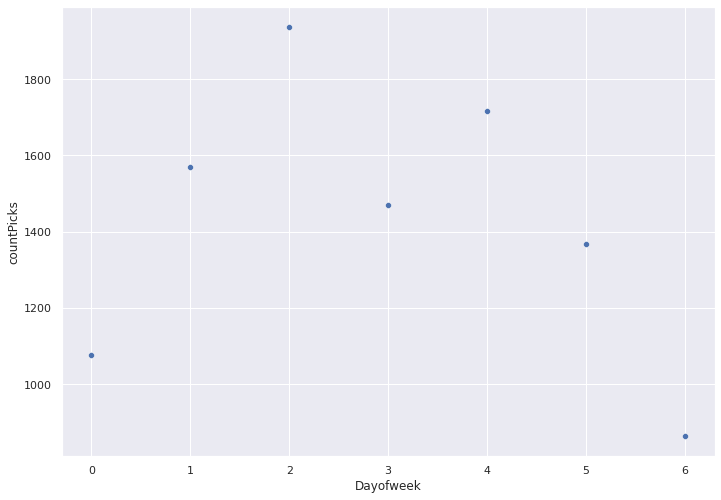

In [17]:
gr= data.groupby("Dayofweek").agg(
    countPicks=pd.NamedAgg(column="Lat", aggfunc="count")).reset_index()

sns.scatterplot(data=gr, x="Dayofweek", y="countPicks")

# Making model

In [6]:
sc=StandardScaler()
X = sc.fit_transform(data)

In [7]:
data.count()

Lat          100000
Lon          100000
Dayofweek    100000
dtype: int64

In [11]:
# On ré-entraîne un KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters= 7)
kmeans.fit(X)

KMeans(n_clusters=7)

**Clustering each pickup**

In [13]:
data.loc[:,'Cluster_KMeans'] = kmeans.predict(X)
data.head()

,Lat,Lon,Dayofweek,Cluster_KMeans
0,40.2201,-74.0021,0,2
1,40.7500,-74.0027,0,0
2,40.7559,-73.9864,0,0
3,40.7450,-73.9889,0,4
4,40.8145,-73.9444,0,0


In [16]:

mask = data["Cluster_KMeans"] != -1
fig = px.scatter_mapbox(data[mask], lat="Lat", lon="Lon",   size_max=15, zoom=10, color='Cluster_KMeans')
fig.update_layout(mapbox_style="carto-positron")
fig.show()